<div align="center"> 
    <hr>
  <font size="6"><b>Dev | CCER with Tf-Idf</b> </font>
   <hr>
</div>

In [1]:
!python --version

Python 3.9.1


In [53]:
import os
import sys
import pandas as pd
import networkx
from networkx import draw, Graph
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from pyjedai.utils import (
    text_cleaning_method,
    print_clusters,
    print_blocks,
    print_candidate_pairs
)
from pyjedai.evaluation import Evaluation, write
from pyjedai.datamodel import Data
d1 = pd.read_csv("./data/ccer/D2/abt.csv", sep='|', engine='python')
d2 = pd.read_csv("./data/ccer/D2/buy.csv", sep='|', engine='python')
gt = pd.read_csv("./data/ccer/D2/gt.csv", sep='|', engine='python')

data = Data(
    dataset_1=d1,
    id_column_name_1='id',
    dataset_2=d2,
    id_column_name_2='id',
    ground_truth=gt
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Simple workflow

In [54]:
from pyjedai.block_building import StandardBlocking
from pyjedai.block_cleaning import BlockFiltering
from pyjedai.block_cleaning import BlockPurging
from pyjedai.comparison_cleaning import WeightedEdgePruning, WeightedNodePruning, CardinalityEdgePruning, CardinalityNodePruning
from pyjedai.matching import EntityMatching

sb = StandardBlocking()
blocks = sb.build_blocks(data)
sb.evaluate(blocks, with_classification_report=True)

bf = BlockFiltering(ratio=0.8)
filtered_blocks = bf.process(blocks, data, tqdm_disable=False)

cbbp = BlockPurging()
cleaned_blocks = cbbp.process(filtered_blocks, data, tqdm_disable=False)
cbbp.evaluate(cleaned_blocks, with_classification_report=True)

wep = CardinalityEdgePruning(weighting_scheme='X2')
candidate_pairs_blocks = wep.process(filtered_blocks, data)
wep.evaluate(candidate_pairs_blocks, with_classification_report=True)

Standard Blocking:   0%|          | 0/2152 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Standard Blocking
***************************************************************************************************************************
Method name: Standard Blocking
Parameters: 
Runtime: 0.1814 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.11% 
	Recall:        99.81%
	F1-score:       0.23%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1074
	False positives: 948081
	True negatives: 209693
	False negatives: 2
	Total comparisons: 949155
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

Block Purging:   0%|          | 0/3386 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Block Purging
***************************************************************************************************************************
Method name: Block Purging
Parameters: 
	Smoothing factor: 1.025
	Max Comparisons per Block: 9750.0
Runtime: 0.0498 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.33% 
	Recall:        99.16%
	F1-score:       0.66%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1067
	False positives: 320252
	True negatives: 837515
	False negatives: 9
	Total comparisons: 321319
────────────────────────────────────────────────────────────────────────────────────────────

Cardinality Edge Pruning:   0%|          | 0/1076 [00:00<?, ?it/s]

***************************************************************************************************************************
                                         Μethod:  Cardinality Edge Pruning
***************************************************************************************************************************
Method name: Cardinality Edge Pruning
Parameters: 
	Node centric: False
	Weighting scheme: X2
Runtime: 17.8059 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      5.86% 
	Recall:        87.92%
	F1-score:      10.99%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 946
	False positives: 15191
	True negatives: 1142455
	False negatives: 130
	Total comparisons: 16137
──────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 5.862304021813224,
 'Recall %': 87.9182156133829,
 'F1 %': 10.991692325567884,
 'True Positives': 946,
 'False Positives': 15191,
 'True Negatives': 1142455,
 'False Negatives': 130}

In [55]:
em = EntityMatching(metric='tf-idf', tokenizer = 'char_qgram_tokenizer', qgram=2, tfidf_similarity_metric='jaccard', similarity_threshold=0.0)
pairs_graph = em.predict(candidate_pairs_blocks, data)
em.evaluate(pairs_graph)

Entity Matching (tf-idf):   0%|          | 0/1065 [00:00<?, ?it/s]

C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Tokenizer: char_qgram_tokenizer
	Metric: tf-idf
	Similarity Threshold: 0.0
Runtime: 8.4217 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      5.86% 
	Recall:        87.92%
	F1-score:      10.99%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 5.862304021813224,
 'Recall %': 87.9182156133829,
 'F1 %': 10.991692325567884,
 'True Positives': 946,
 'False Positives': 15191,
 'True Negatives': 1142455,
 'False Negatives': 130}

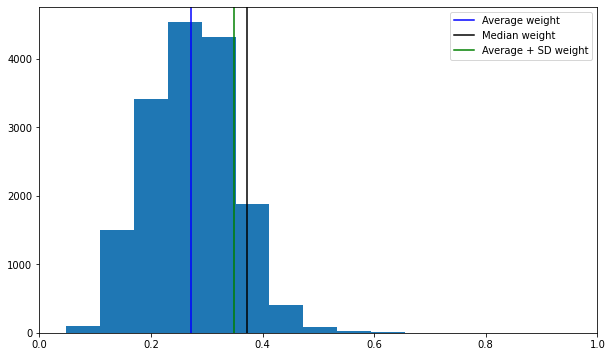

In [49]:
em.plot_distribution_of_all_weights()

Distribution-% of predicted scores:  [0.31344109151250693, 19.156782004793804, 43.19341159117448, 32.59172761354557, 4.31442443611333, 0.3933378403294204, 0.03687542253088316, 0.0, 0.0, 0.0]


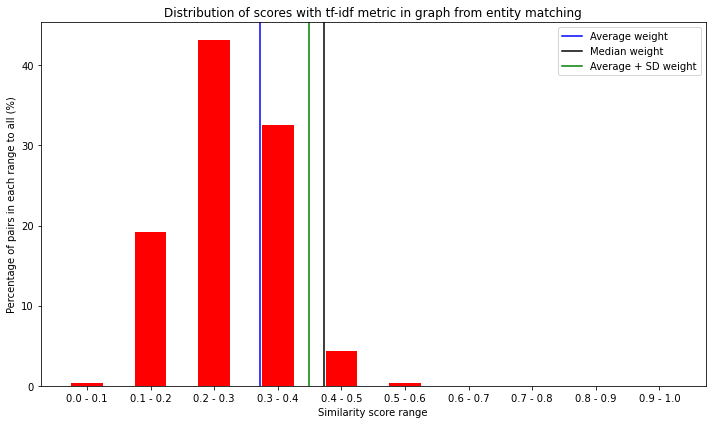

In [50]:
em.plot_distribution_of_scores()

In [51]:
from pyjedai.clustering import UniqueMappingClustering
umc = UniqueMappingClustering()
clusters = umc.process(pairs_graph, data)
umc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
Runtime: 0.2400 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     76.15% 
	Recall:        67.66%
	F1-score:      71.65%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 728
	False positives: 228
	True negatives: 1157200
	False negatives: 348
	Total comparisons: 956
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 76.15062761506276,
 'Recall %': 67.65799256505576,
 'F1 %': 71.65354330708661,
 'True Positives': 728,
 'False Positives': 228,
 'True Negatives': 1157200,
 'False Negatives': 348}